## Instructions:
- You can use NN libraries such as tensorflow, pytorch, etc. But implement GAN and VAE on your own.
- Zero tolerance for plagiarism. Do not copy from Practice and Share; the student who submitted there originally only can use; Github tracks who pushed what code.
- Total marks: 50
- Marks will be for answering the questions asked below, not for the codes. Use plots, tables, etc. to convey your answers.

In [ ]:
import numpy as np
np.random.seed(5)
import matplotlib.pyplot as plt

# VAEs vs GANs
The objective of this exercise is to compare VAEs and GANs for a generative modeling task (generating samples from a mixture of Gaussians).

- Prepare the target probability distribution $p_x^*$ as a GMM with 5 components.
(Using snippets from CodingQuiz1.py is allowed)
- Construct and train a VAE to model $p^*_x$.
- Construct and train a GAN to model $p^*_x$.


## Questions
###1. **Plot the samples from original $p^*_x$, VAE and GANs to compare them visually. (You may plot them on same or different plots) [10 marks]**

Please see this notebook and the VAE_Main notebook to see the plots.
 
###2. **Quantify the performance of the two models and compare them. (Think what all metrics can you use - report as many as you can) [10 marks]**
 
#### Metric 1 – **Log-Likelihood of Generated/Sampled points**
One way would be to compare the log-likelihoods for the two models, when they generate 1000 new samples each. This is possible as I have $p_x^*$ explicitly defined. So I can compute p(x) for each sample 'x'.
The closer the value of log-likelihood is to 0, the better is the performance of the model, as it is producing new samples whose p(x) is close to 1.
 
###### **How would I generate new samples for each of VAE and GAN?**
 
    1. For GAN, just use 1000 latent vectors sampled from 2D-normal and send to G. The output of G are the new samples.
    2. For VAE, just sample from the latent space directly which is represented by N(0, I). Dimension of I depends on the dimension of the latent space.It is 2 here. Then find the observable points by passing these latent vectors through the Decoder of the VAE.
 
#### Metric 4 -- **MSE Loss in VAE**
We can quantify the performance of VAE by measuring its ability to re-construct the points from the original GMM. This quantification can be done by measuring the MSE loss between the original and re-constructed points.
This type of metric is not possible for GAN, hence using this metric one cannot compare GAN to VAE.  
Less the MSE loss, the better the VAE model is.

#### Metric 3
By visually comparing the samples from VAE and GAN, to see how similar the plot is to the plot obtained from the samples of GMM.
 
#### Metric 4 — **Negative Log-Likelihood**
Just take the absolute value of the Log-Likelihood calculated in Metric 1. 
Less value of Negative Log-Likelihood means a better model.
 
 
###3. **Expressivity vs Efficiency: Which of the two models is more expressive? Which is more efficient? (Number of parameters vs performance, computations vs performance, etc.) [10 marks]**
 
#### **Expressivity**
If **Expressivity = Modelling Power**(as told by Vipul Sir through mail).  

Then GAN is more expressive than VAE. It does not force the underlying distribution to be close to N(0, I) unlike VAE.  
Also in my experiments, I found that when I samples from the GAN are closer to the actual samples, than in case of VAE. This is further verified quantitatively by comparing the log-likelihoods of GAN and VAE on 1000 generated samples.



If **Expressivity implies Transparency to Internal Working**  
```
I think that VAE is way more expressive than GAN in terms of its internal working. 
Because we can relate the latent states of a VAE to the actual observed 
states and can even visualise the latent space to see the major clusters, 
while in case of GANs we can't draw any direct correspondence between latent states and observed states.
Latent space does not hold much physical meaning in case of GAN, 
it only acts as a tool to solve the problem. 
Hence GAN does the same work as VAE, but one cannot
 understand its internal mappings by visualising them, thus reducing the expressibility of its latent space.
```
 
#### **Efficiency**
For performance I have used the metric - **Log-likelihood**. It's a negative number. Model with log-likelihood closer to zero is better. That is less negative log-likelihood is better.

One can also use the metric **negative log-likelihood**, which is just the absolute value of log-likelihood. Model with a lower value of negative log-likelihood is better.  
 
Calculate the current number of parameters for both and no computations for both.
 
#### **Calculating the number of computations:-**
For a dense layer with N inputs and M outputs :---
Number of sums = N+1  

Number of multiplications = N * M  

Number of times activation function is applied = M  

Total for each dense = $(M+1)*(N+1)$

**For GAN:-**  
 
For D of GAN = $129*3 + 129*129 + 257*129 + 3*257= 50178$   
For G of GAN = $129*3 + 2*(129*129) + 257*129 + 257*257 + 3*257 = 132995$  
For GAN total = D+G = $183173$  

  

**For VAE**,  

Decoder = $3*17 + 17*17 + 17*17 + 17*3 = 680$  
Encoder = $3*17 + 17*17 + 17*17 + 17*3 = 680$


 
#### **Calculating the number of parameters:-**
 
I just used model.summary() to calculate the number of parameters in each of VAE and GAN.
 
For a dense layer with N inputs and M outputs number of parameters = M*(N+1).
 
Number of parameters in GAN = $199,427$  


Number of parameters in VAE = $1,830$  


Log-likelihood of VAE = Around   $-3300$  

Log-likelihood of GAN = Around   $-800$


**Inferences drawn**:-  

GAN performes better than VAE when Log-likelihood if used as performance measure,as GAN's Log-Likelihood is closer to zero than that of VAE's.  

**Efficiency:-** In terms of Efficiency, VAE is better by a very big margin, due to very less number of parameters and very less number of computations involved.  

**Expressivity**:-  
As the samples obtained from GAN are more realistic and closer to the samples from $p_x^*$ and also the log-likelihood of these independent samples is closer to 0 than that of VAE, from my experiments I conclude that GAN is better than VAE in terms of Expressivity.
 
###4. **Compare the pros and cons of the two models in a table. [10 marks]**
 
#### **GAN** 
##### **Cons of GAN**
1. **Visualisation of Latent Space**  


As it is not possible to get the latent vector corresponding to a point in observed space, hence visualisation of latent space won’t give us any info regarding the distribution of data.
 
Hence in the case of GAN, we can’t make any observation regarding the clustering of samples from the same component of GMM in the latent space.
 
2. **Generator and Discriminator Training Unpredictability**  

One of them shouldn't be too strong, and achieving the right balance of strength of D and G is difficult.
 I had to rely on a bit of luck to get the right training for G and D
 
3. **GAN Cannot generate or sample new data points near to the already sampled data in controlled manner.**  

Lets say we generated a 2d point(x1, y1) in space by giving a latent vector z sampled from latent space to the Generator.
Now lets say we want to generate another point in the observed space, which is very close to this 2d point that we generated earlier. 
Now due to the limitation that we don't have any intuitive correspondence between the points in the observed 2d space and the latent space of Generator, we won't be able to find a 'z' by some calculation(any deterministic method) which can give us a point which is close to the point that we generated earlier i.e.(x1, y1).
We can’t find the desired ‘z’ in latent space to get the desired point in observed space.

4. By default, a GAN cannot generate samples in controlled manner according to some constraints. To overcome this, Conditional-GAN are used.
 
##### **Pros of GAN**
1. We don’t have to think anything about the underlying distribution being similar to any particular distribution as in the case of VAE in which we want N(0, I) in the latent space. This gives more flexibility to the model to capture more variace.
 
#### **VAE**
##### **Pros of VAE**
1. **Visualisation of Latent Space**
We can easily visualise the structure present in the latent space and relate the structure to the samples in the observed space(GMM).
This is explored well in the notebook of VAE along with plots.
For more look at the answer of Q5.
 
2. **New data points near to an already observed data point could be obtained by a deterministic method.**

Let (x1, y1) be a data point that we randomly sampled from the latent space of VAE.
In case of VAE, we record the $\mu_\phi$ and $\sigma_\phi$ for (x1, y1), then to generate a new point near (x1, y1) we keep $\mu_\phi$ and $\sigma_\phi$ same, and sample a new z(latent vector) such that $z \sim N(\mu_\phi, \sigma_\phi)$, and then decode this new latent vector using the trained decoder of VAE. This would give a new point which are close to (x1, y1) in the observed space. 
We can also control the approximate distance of this new point from (x1, y1). If we increase the value of $\sigma_\phi$, the newly sampled $z$ can lie far away from the $\mu_\phi$, and hence the resulting output obtained through the decoder would also be farther away from (x1, y1) in observed space. So in a way we can control how much variation we want in the new sample, which we want to obtain near an already observed sample. This control of variation is not present in sampling data points from GANs.
 
3. **Continuity of Latent Space as compared to normal auto-encoder.**

This continuity in latent space is brought about because of the KL Divergence loss included in VAE as compared to auto-encoder.
This ensures that when we draw new samples from the latent space of VAE, then they are not just random samples un-related to data, but have characteristics of the data on which we trained the model.
 
4. **Path Tracing of Vector in Latent Space of VAE**
We can reduce/increase the value of a particular feature in the sampled points by finding the vector direction of that feature in the latent space of VAE.
 
##### **Cons of VAE**
1. Difficulty in deciding the relative weightage that one should give to the two losses - KL Divergence Loss and MSE Loss(between re-construction and real data point). More on this is explained in Q5.  
2. We try to bring the latent space of VAE as close as possible to $N(0, I)$, using the KL Divergence Loss. But this may not be able to capture the full variance in the data.
 
###5. **Do you find a structure in the latent space in the two models? E.g., each Gaussian component of $p^*_x$ may correspond to a specific region in the latent space. [10 marks]**
 
We can only visualise the latent space of VAE to draw any conclusions.
Yes, I did find in the plot that the points belonging to a particular Gaussian component of GMM are clustered together to a specific region in the latent space of VAE. See the notebook VAE_Main for the plots.   
 
**Important Findings in the Structure of Latent Space of VAE**:-
1. The amount of separation between these clusters for each component in the latent space of VAE can be controlled by controlling the amount of relative weightage given to the two losses:-
  1. When more weightage is given to KL Divergence Loss as compared to the MSE loss(between the real and re-constructed point), then the components tend to diffuse together while maintaining their clustering property. 
  Hence in this case the latent space is more continuous.
  2. When more weightage is given to MSE loss(between the real and re-constructed point) as compared to the KL Divergence Loss, then the clustered tend to be separated in the latent space and the diffusion between the clusters is less.

*The two notebooks named 'VAE_more_MSE_loss_Q5_and_Q2' and 'VAE_more_KL_loss_Q5_and_Q2' are made to prove the above observations about the latent space.*

# Importing

In [ ]:
import numpy as np
import os
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers

import tensorflow_probability as tfp
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
np.random.seed(5)
import matplotlib.pyplot as plt

from tensorflow.keras import backend as K
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use('seaborn')

# GMM Creation

In [ ]:
class Gaussian:
    def __init__(self, mu=None, sigma=None) -> None:
        '2D Gaussian pdf'
        D = 2
        self.mu = mu if mu is not None else  10 * (np.random.random(D) - 0.5)
        self.sigma = sigma if sigma is not None else 0.05*(np.eye(2) + 0.1*np.random.random((2,2)))
        self.sigma = (self.sigma + self.sigma.T)/2   # to make it symmetric
        self.sigmainv = np.linalg.inv(self.sigma)
        self.Z = 2*np.pi*np.sqrt(np.linalg.det(self.sigma))
    def sample(self, S=1):
        'return SxD np array'
        return np.random.multivariate_normal(self.mu, self.sigma, size=S)
    def prob(self, x_s):
        'x_s is SxD; returns an np array of len S'
        retval = []
        for x_mu in (x_s-self.mu):
             retval.append(np.exp(-0.5*(x_mu).T @ (self.sigmainv) @ (x_mu))/self.Z)
        return np.array(retval)
        
class GMM:
    def __init__(self, N=5) -> None:
        'GMM with N Gaussian components'
        self.components = [Gaussian() for _ in range(N)] 
        self.weights = np.random.random(N)
        self.weights /= np.sum(self.weights)
    def sample(self, S=1):
        #print(self.weights)
        retval = []
        count_z = np.random.multinomial(S, self.weights)
        #print(count_z)
        for z, count in enumerate(count_z):
            retval.append(self.components[z].sample(S=count))
        return np.vstack(retval)
    def prob(self, x_s):
        retval = []
        p = np.zeros(len(x_s))
        for z, w in enumerate(self.weights):
            p += w * self.components[z].prob(x_s)
        return p
    
    def gs_components(self):
      return self.components

def plot_samples_2d(data, filename=None):
    'data is SxD'
    plt.figure(figsize=(5,5))
    plt.scatter(data[:, 0], data[:, 1]) 
    if filename:
        plt.savefig('./%s'%(filename) + ".png", format="png")

In [ ]:
gmm = GMM()
gs = gmm.gs_components()

### Plot 0: True Samples from the GMM

### Q1. Plot of Real Samples from GMM

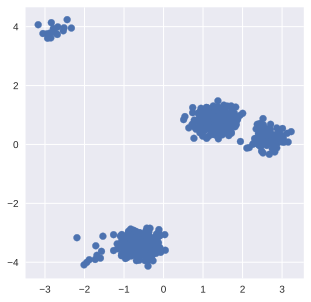

In [ ]:
plot_samples_2d(gmm.sample(1000))

# GAN Training
### Latent Vector 'z' sampled from 2D Gaussian

In [ ]:
tfd = tfp.distributions

In [ ]:
gaussian_2d = tfd.MultivariateNormalDiag(
    loc=[0.0, 0.0],
    scale_diag=[1, 1])

gaussian_1d = tfd.MultivariateNormalDiag(
    loc=[0.0],
    scale_diag=[1])

In [ ]:
NUM_BATCHES = 2000
BATCH_SIZE = 512
LATENT_DIM = 2

In [ ]:
def generator(LATENT_DIM, output_dim):
    input_layer = layers.Input((LATENT_DIM,))
    X = input_layer
    for i in range(4):
        X = layers.Dense(128)(X)
        X = layers.LeakyReLU(0.1)(X)
    
    for i in range(2):
        X = layers.Dense(256)(X)
        X = layers.LeakyReLU(0.1)(X)

    output_layer = layers.Dense(output_dim)(X)
    G = Model(input_layer, output_layer)
    return G

In [ ]:
def discriminator(dim):
    input_layer = layers.Input((dim,))
    X = input_layer
    for i in range(2):
        X = layers.Dense(128)(X)
        X = layers.LeakyReLU(0.1)(X)

    for i in range(1):
        X = layers.Dense(256)(X)
        X = layers.LeakyReLU(0.1)(X)

    output_layer = layers.Dense(1, activation='sigmoid')(X)
    D = Model(input_layer, output_layer)
    D.compile(Adam(learning_rate=0.002, beta_1=0.5),
                        loss='binary_crossentropy',
                        metrics=['accuracy'])
    return D

In [ ]:
def build_GAN(G, D, LATENT_DIM):
    D.trainable = False
    input_layer = layers.Input((LATENT_DIM,))
    X = G(input_layer)
    output_layer = D(X)
    GAN = Model(input_layer, output_layer)
    GAN.compile(Adam(learning_rate=0.001, beta_1=0.5),
                        loss='binary_crossentropy',
                        metrics=['accuracy'])
    return GAN

In [ ]:
G = generator(LATENT_DIM, 2)
D = discriminator(2)
GAN = build_GAN(G, D, LATENT_DIM)

In [ ]:
D.summary()

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 2)]               0         
                                                                 
 dense_49 (Dense)            (None, 128)               384       
                                                                 
 leaky_re_lu_40 (LeakyReLU)  (None, 128)               0         
                                                                 
 dense_50 (Dense)            (None, 128)               16512     
                                                                 
 leaky_re_lu_41 (LeakyReLU)  (None, 128)               0         
                                                                 
 dense_51 (Dense)            (None, 256)               33024     
                                                                 
 leaky_re_lu_42 (LeakyReLU)  (None, 256)               0  

In [ ]:
G.summary()

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 2)]               0         
                                                                 
 dense_42 (Dense)            (None, 128)               384       
                                                                 
 leaky_re_lu_34 (LeakyReLU)  (None, 128)               0         
                                                                 
 dense_43 (Dense)            (None, 128)               16512     
                                                                 
 leaky_re_lu_35 (LeakyReLU)  (None, 128)               0         
                                                                 
 dense_44 (Dense)            (None, 128)               16512     
                                                                 
 leaky_re_lu_36 (LeakyReLU)  (None, 128)               0  

In [ ]:
GAN.summary()

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 2)]               0         
                                                                 
 model_12 (Functional)       (None, 2)                 149250    
                                                                 
 model_13 (Functional)       (None, 1)                 50177     
                                                                 
Total params: 199,427
Trainable params: 149,250
Non-trainable params: 50,177
_________________________________________________________________


In [ ]:
step_count = []
D_accuracy = []
G_accuracy = []
D_loss = []
G_loss = []
count = 0

print("D_loss", "G_loss" )
for step in range(NUM_BATCHES):
    print(f'1b: {step}/{NUM_BATCHES}', end='\r')
    
    # Train discriminator
    D.trainable = True
    real_samples = gmm.sample(BATCH_SIZE // 2)
    generated_samples = G.predict(gaussian_2d.sample(BATCH_SIZE // 2), batch_size=BATCH_SIZE // 2)
    data = np.concatenate((real_samples, generated_samples), axis=0)
    real_labels = np.ones((BATCH_SIZE // 2, 1))
    fake_labels = np.zeros((BATCH_SIZE // 2, 1))
    labels = np.concatenate((real_labels, fake_labels), axis=0)
    _D_loss, _D_accuracy = D.train_on_batch(data, labels)

    
    # Train generator
    D.trainable = False
    latent_samples = gaussian_2d.sample(BATCH_SIZE)
    labels = np.ones((BATCH_SIZE, 1))
    _G_loss, _G_accuracy = GAN.train_on_batch(latent_samples, labels)
    
    # D_loss.append(_D_loss)
    # D_accuracy.append(_D_accuracy)
    # G_loss.append(_G_loss)
    # G_accuracy.append(_G_accuracy)
    print(_D_loss, _G_loss,)
        

D_loss G_loss
0.6927777528762817 0.6959967017173767
0.6016242504119873 0.6946145296096802
0.5325117707252502 0.6855483651161194
0.49127712845802307 0.6661792993545532
0.48653292655944824 0.6218962073326111
0.5200705528259277 0.5952214598655701
0.5655100345611572 0.610918402671814
0.5997127294540405 0.6747757196426392
0.7047519087791443 0.7102599143981934
0.8962333798408508 0.6469008922576904
1.0416374206542969 0.6131382584571838
0.9009489417076111 0.7318723201751709
0.7072359919548035 1.3517649173736572
0.6429674029350281 1.2099230289459229
0.745389997959137 0.9360211491584778
0.7731223106384277 0.9129578471183777
0.750747799873352 0.9633418321609497
0.7293531894683838 0.9585927724838257
0.7030166387557983 0.9196308851242065
0.6759023666381836 0.868991494178772
0.6443023085594177 0.7980960011482239
0.6349406242370605 0.7331684827804565
0.6299123764038086 0.6658260822296143
0.6574378609657288 0.6039323210716248
0.6879185438156128 0.5626764297485352
0.7403168678283691 0.593814492225647
0

### Observations Made during the training of GAN
1. The training losses for the D and G are highly un-predictable. If the discriminator becomes too strong during the intial part of the training, then the G is not able to improve at all.
2. Upon running the training loop for multiple iterations, I had to depend on luck, as to when the D and G are being trained equally well.
3. In problems like regression and classification problems using NN, this un-predictibility of the models does not arise.

## Q1. Generating new samples using the trained Generator

New Generated Samples

### Q1. Plot of New Samples from GAN

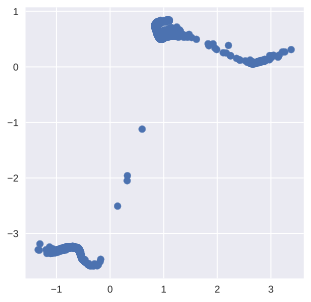

In [ ]:
z = gaussian_2d.sample(1000)
new_samples = G(z)
plot_samples_2d(new_samples)

### Q1. Real Samples from the GMM for comparison

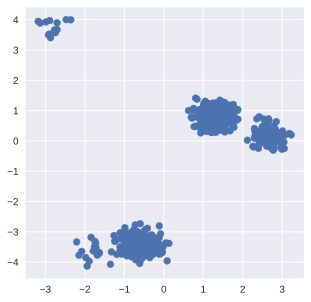

In [ ]:
plot_samples_2d(gmm.sample(1000))

### Observations made from plotting the generated samples in two cases - using 1d gaussian latent space and using 2d gaussian latent space for GAN.
1. When I used 1D Gaussian as latent space to sample the latent vectors, the results were very bad. I derived the conclusion that 1D Gaussion latent space is not complex enough of model a GMM.

### Q2. Evaluating GAN using Log-Likelihood of Generated points

In [ ]:
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

In [ ]:
probs = gmm.prob(new_samples)

In [ ]:
# print(probs.shape, new_samples.shape)

In [ ]:
log_likelihood = 0
for p in probs:
  log_likelihood += tf.math.log(p)

In [ ]:
# print(probs)

In [ ]:
log_likelihood

<tf.Tensor: shape=(), dtype=float64, numpy=-849.2469837098088>

# Q5. Plotting Latent Space of GAN

I didn't find any way to relate the vectors/points in the latent space of GAN to the observable points from the different Gaussian components of the GMM.
Hence according to my understanding the structure of the latent space of GAN could not be identified, as their is no way in which one can find the latent vector corresponding to a given observation from sample space.  

In case of VAE, one can find the corresponding region in the latent space by passing the observation sample through the encoder, and noting down the $\mu$ and $\sigma$ returned by encoder. The latent vector corresponding to an observation sample lies within the region defined by $N(\mu, \sigma)$ in the latent space, returnd by the encoder. This idea also gives more robustness to the model, cause the same observation sample can have more than one latent vector corresponding to it, cause latent vector is a sample from  $N(\mu, \sigma)$ in the latent space, where $\mu$ and $\sigma$ are the outputs of th e encoder.

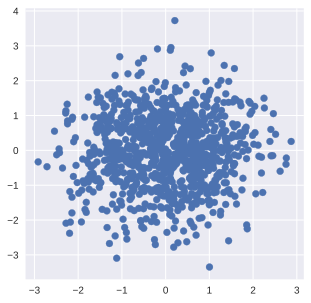

In [ ]:
latent_space_samples = gaussian_2d.sample(1000)
plot_samples_2d(latent_space_samples)

# Q5. Insights and Explanation Regarding GAN Latent Space




1. first of all define what is the objective of GAN here and what do you mean by the latent space of GAN?

2. As here we are sampling a point from latent space, feeding into the generator and then treating that output as some new point which is a part of the inherent p_star, can we really track back in the latent space? 

3. -- given any new point sampled from the one of the gaussian component of the GMM(which has 5 gaussian component), how can we find the latent vector in z space corresponding to this point? At this point it seems like the latent space itself has no meaning as we cannot connect any observed state to it. --- Hence this is one of the major limitations of GAN.
4. In case of VAE, we get the latent state from an observed state, hence it is possible to connect the location of latent state in latent space to the observed states.

5. Another limitation of GAN:----
Lets say we generated a 2d point(x1, y1) in space by giving a vector z sampled from latent space to the Generator.
Now lets say we want to generate another point, which is very close to this 2d point that we generated earlier. 

Now due to the limitation that we don't have any intuitive correspondance between the points in the 2d space and the latent space of Generator, we won't be able to find a 'z' by some calculation which can give us a point which is close to the point that we generated earlier(x1, y1).

In case of VAE, we record the $\mu_\phi$ and $\sigma_\phi$ for (x1, y1), then to generate a new point near (x1, y1) we keep $\mu_\phi$ and $\sigma_\phi$ same, and sample a new z such that $z \sim N(\mu_\phi, \sigma_\phi)$, and then decode this new latent vector using the trained decoder. This would give a new point close to (x1, y1).

We can also control the approximate distance of this new point from (x1, y1). If we increase the value of $\sigma_\phi$, we the newly sampled $z$ can lie far away from the $\mu_\phi$, and hence the resulting output obtained through the decoder would also be farther away.

Extending this concept to application of GAN to generate new faces, lets say we generated a male face with no moustache. Then if want to generate a new male face with little moustache, then we don't have any method to find the correct latent vector, other than just hit and trail so find the correct vector.

So this way, if we want to change some


6. Path tracing in case of VAEs
Lets say that we have a 2d latent space.

7. Generating a mixture of features using vector addition in VAE.